## Лабораторна робота №2.



Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.






Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою `titanic.csv`.  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.```
  
  
  

In [1]:
import re

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


dataset = pd.read_csv("./titanic.csv")

**Задача 1:** Який відсоток виживання серед чоловіків / жінок?

In [4]:
def calculate_survival_rates(gender, dataset):
    gender_data = dataset[dataset['Sex'] == gender]['Survived']
    return round(100 * gender_data.mean(), 1)

women_survival_rate = calculate_survival_rates('female', dataset)
men_survival_rate = calculate_survival_rates('male', dataset)

print(f"Survived women %: {women_survival_rate}%")
print(f"Survived men %: {men_survival_rate}%")

Survived women %: 74.2%
Survived men %: 18.9%


**Задача 2:** Відтворіть ці графіки  
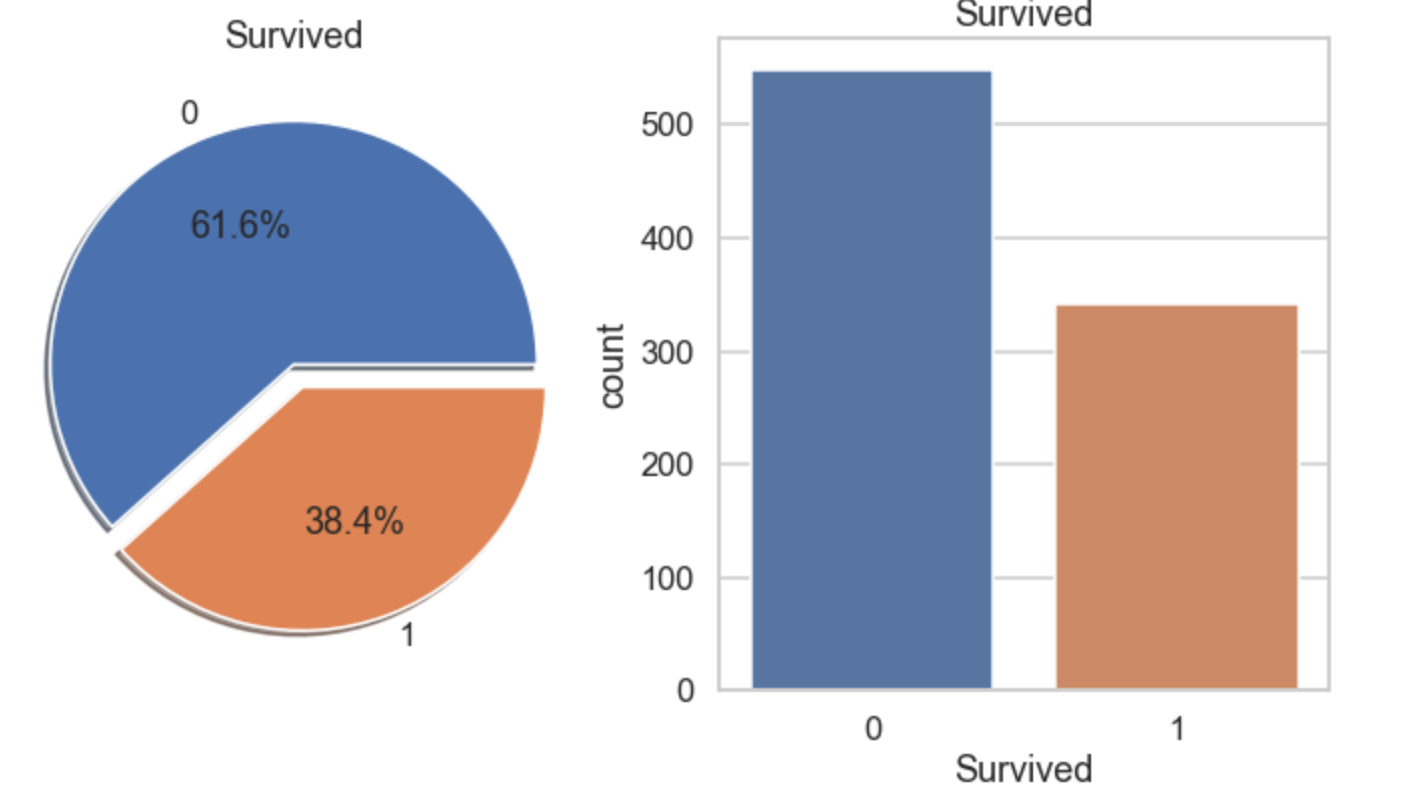


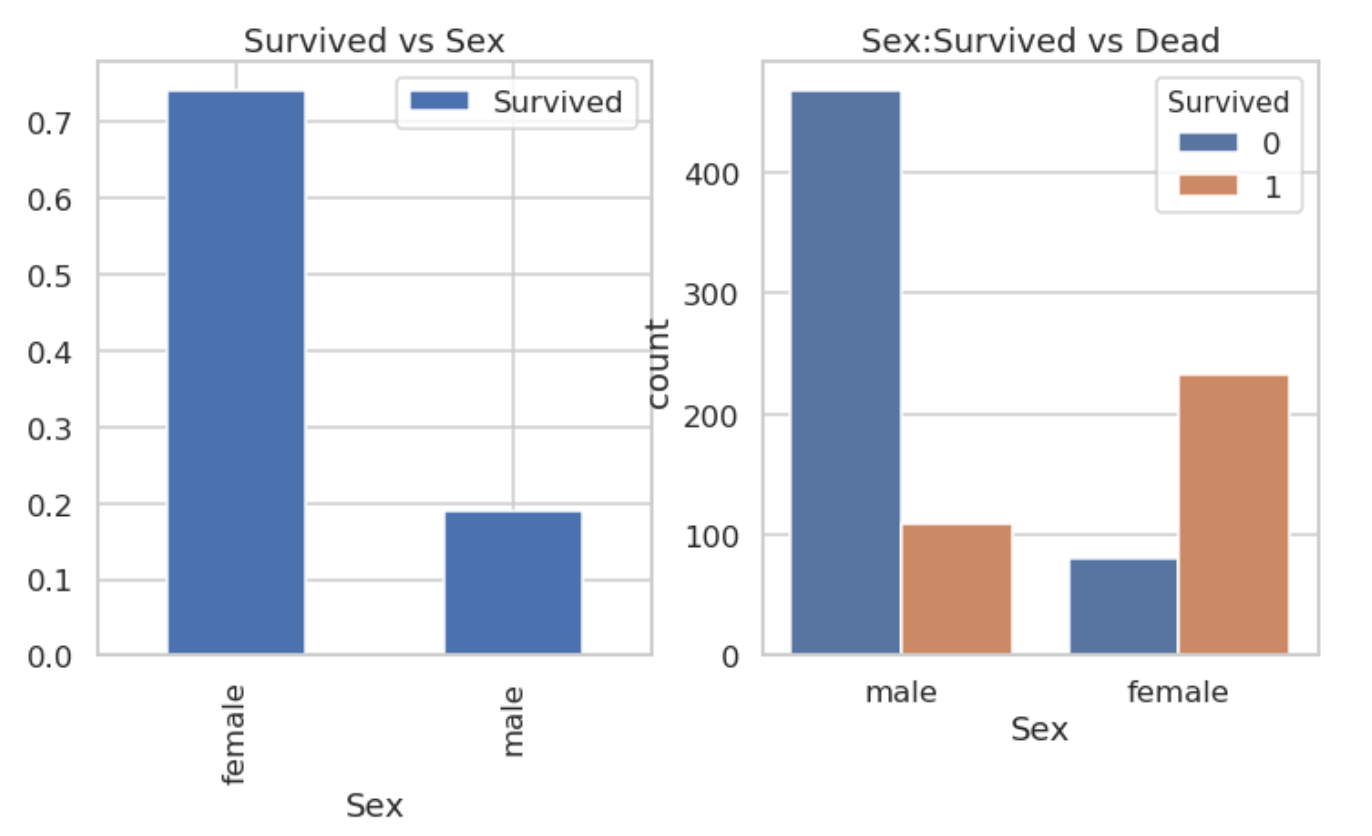

<ipython-input-10-7cc3888a6855>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_survived_vs_sex, x='Sex', y='Decimal Percentage', ax=axs[1, 0], palette=['#5975A4'])
<ipython-input-10-7cc3888a6855>:29: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df_survived_vs_sex, x='Sex', y='Decimal Percentage', ax=axs[1, 0], palette=['#5975A4'])


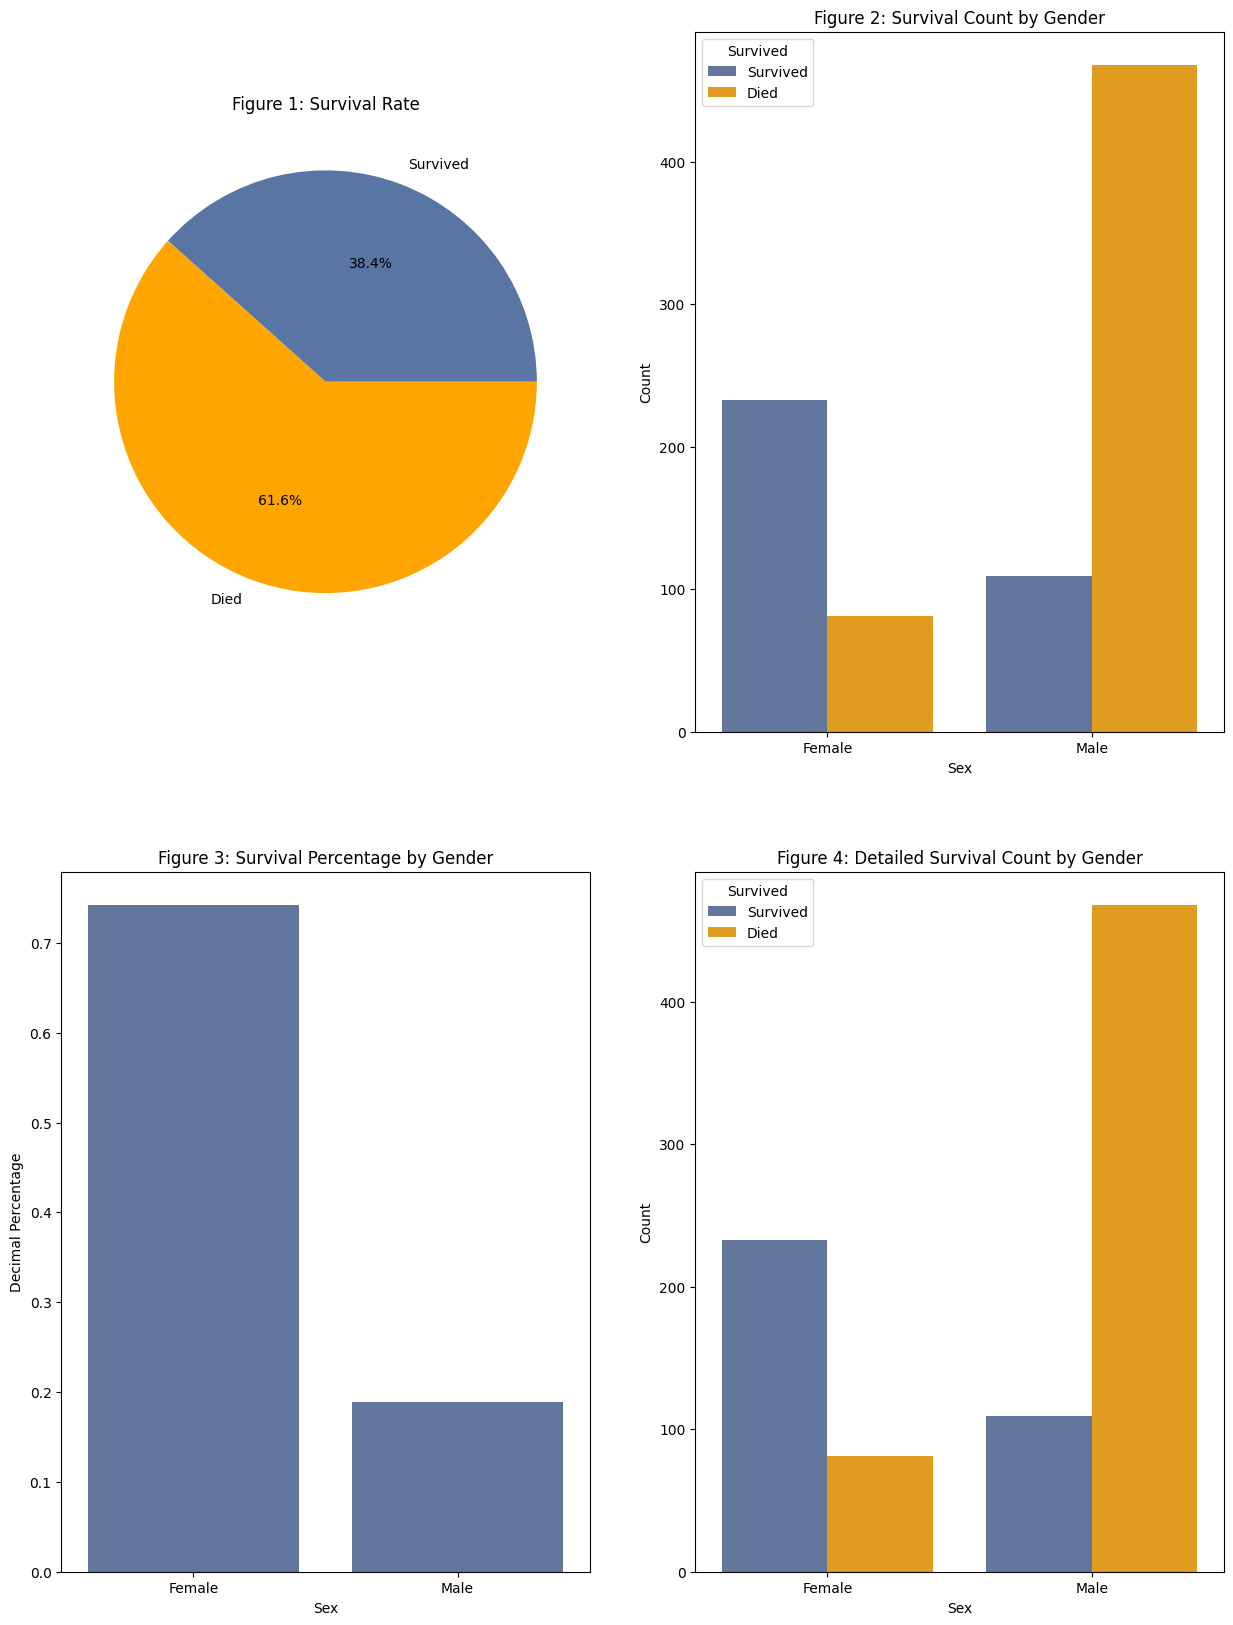

In [10]:
survival_count = dataset["Survived"].value_counts()
people_count = dataset.groupby("Sex")["Survived"].value_counts().sort_index(ascending=False)

survived_percentage = (survival_count[1] / survival_count.sum()) * 100
died_percentage = (survival_count[0] / survival_count.sum()) * 100

df_survival_rate = pd.DataFrame({'Survived': ['Survived', 'Died'], 'Percentage': [survived_percentage, died_percentage]})
df_survival_count = pd.DataFrame({
    'Sex': ['Female', 'Male', 'Female', 'Male'],
    'Survived': ['Survived', 'Survived', 'Died', 'Died'],
    'Count': [people_count['female'][1], people_count['male'][1], people_count['female'][0], people_count['male'][0]]
})

all_women = dataset[dataset["Sex"] == "female"]["Survived"]
all_men = dataset[dataset["Sex"] == "male"]["Survived"]
df_survived_vs_sex = pd.DataFrame({
    'Sex': ['Female', 'Male'],
    'Decimal Percentage': [all_women.mean(), all_men.mean()]
})

fig, axs = plt.subplots(2, 2, figsize=(15, 20))

axs[0, 0].pie(df_survival_rate['Percentage'], labels=df_survival_rate['Survived'], autopct='%1.1f%%', colors=['#5975A4', 'orange'])
axs[0, 0].set_title("Figure 1: Survival Rate")

sns.barplot(data=df_survival_count, x='Sex', y='Count', hue='Survived', ax=axs[0, 1], palette=['#5975A4', 'orange'])
axs[0, 1].set_title("Figure 2: Survival Count by Gender")

sns.barplot(data=df_survived_vs_sex, x='Sex', y='Decimal Percentage', ax=axs[1, 0], palette=['#5975A4'])
axs[1, 0].set_title("Figure 3: Survival Percentage by Gender")

sns.barplot(data=df_survival_count, x='Sex', y='Count', hue='Survived', ax=axs[1, 1], palette=['#5975A4', 'orange'], dodge=True)
axs[1, 1].set_title("Figure 4: Detailed Survival Count by Gender")

plt.show()

Прокоментуйте побудовані графіки

**Рисунок №1:**
Поділ виживших та загиблих на Титаніку
На цьому круговому діаграмі представлено відсоткове співвідношення пасажирів, що вижили та загинули під час катастрофи Титаніка. За даними діаграми, 38,4% пасажирів вижило, в той час як 61,6% загинуло, що вказує на високий рівень смертності в цій історичній трагедії.

**Рисунок №2:**
Кількісний аналіз виживших та загиблих
Гістограма відображає абсолютні значення виживших та загиблих на Титаніку. Чітко видно, що кількість загиблих значно перевищує кількість виживших, що ще раз підкреслює трагічний характер події.

**Рисунок №3:**
Відсоток виживших серед чоловіків і жінок
Цей графік показує відсотковий розподіл виживших серед чоловіків та жінок. З діаграми можна зробити висновок, що близько 70% жінок вижило порівняно з менш ніж 20% чоловіків, що вказує на значно вищі шанси на виживання серед жінок.

**Рисунок №4:**
Деталізований аналіз виживання та загибелі за статтю
Баровий графік представляє роздільний аналіз кількості виживших і загиблих чоловіків та жінок. За даними графіку, значно більша частина жінок вижила, в той час як серед чоловіків спостерігається висока частка загиблих, що свідчить про соціальні та безпекові аспекти, які були актуальні на борту Титаніка.

**Задача 3:** Скільки пропущених значень в датасеті по кожній із змінних?

In [ ]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age -> 177 пропущених значень, Cabin -> 687, Embarked -> 2.

**Задача 4:** Назвіть найпопулярніше **жіноче** ім'я на кораблі.

In [28]:
with open('./men_names.csv', "r") as file:
    men_list = file.read().splitlines()

def extract_clean_names(name):
    match = re.search(r'\. (.+)', name)
    if match:
        name_part = match.group(1)
        cleaned_name = re.sub(r"[,;:'\"?!()]", '', name_part)
        name_components = cleaned_name.split()
        female_names = [n for n in name_components if n not in men_list]
        return female_names
    return []

processed_names = dataset[dataset['Sex'] == 'female']['Name'].apply(extract_clean_names).explode()
most_common_names = processed_names.value_counts().head(3)

print(most_common_names)

Name
Mary         20
Anna         17
Elizabeth    15
Name: count, dtype: int64


Найпопулярнішим ім'ям є Mary -> 20, після Anna -> 17 та Elizabeth -> 15.

**Задача 5:** Назвіть найпопулярніше **чоловіче** ім'я на кораблі.

In [32]:
def extract_clean_names(name):
    match = re.search(r'\. (.+)', name)
    if match:
        cleaned_name = re.sub(r"[,;:'\"?!()]", '', match.group(1))
        name_components = cleaned_name.split()
        return name_components
    return []

processed_names = dataset[dataset['Sex'] == 'male']['Name'].apply(extract_clean_names).explode()
most_common_male_names = processed_names.value_counts().head(3)

print(most_common_male_names)

Name
William    49
John       36
Henry      29
Name: count, dtype: int64


Найпопулярнішим ім'ям є William -> 49, після John -> 36 та Henry -> 29.

**Задача 6:** Побудуйте діаграми співвідношення загиблих та виживших за інформацією про те, квитки якого класу були у пасажирів.
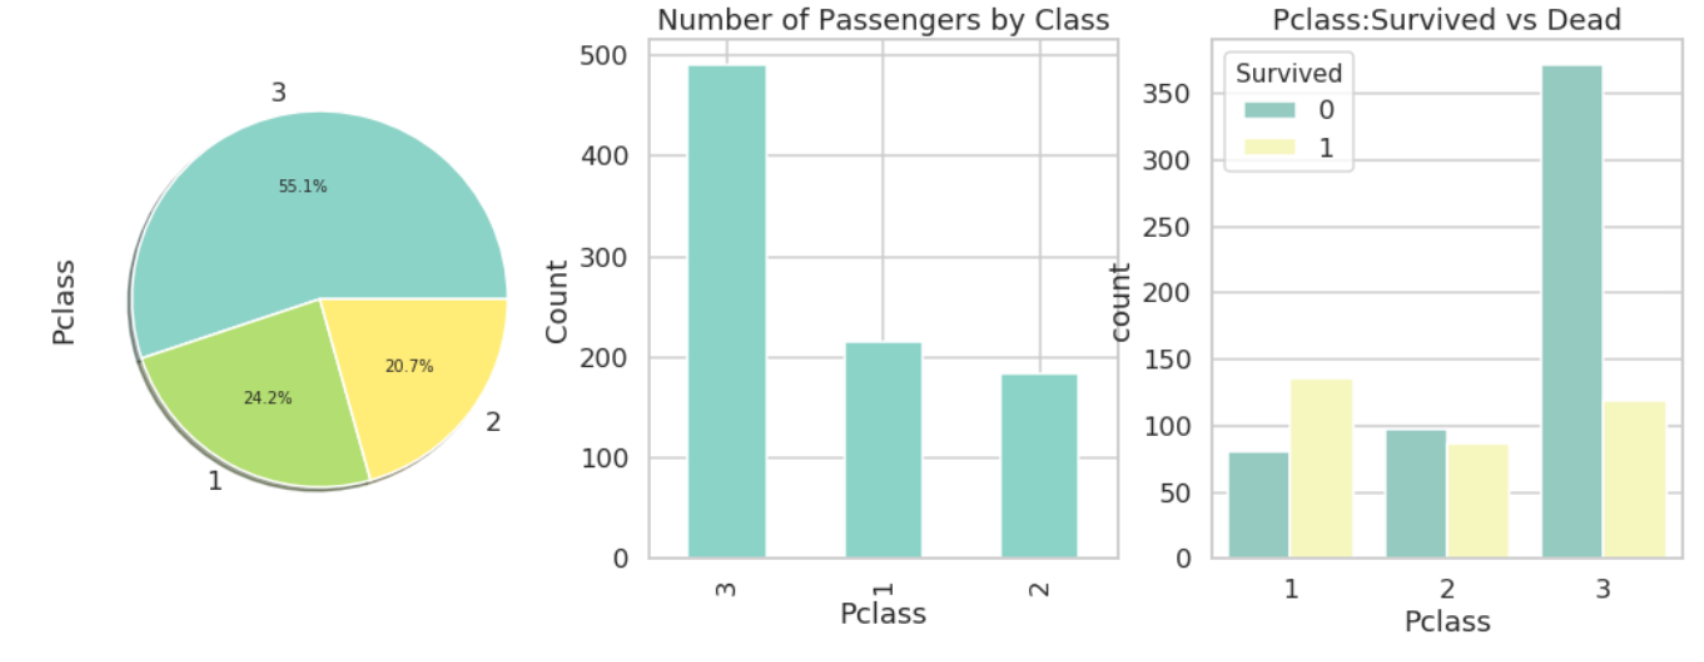

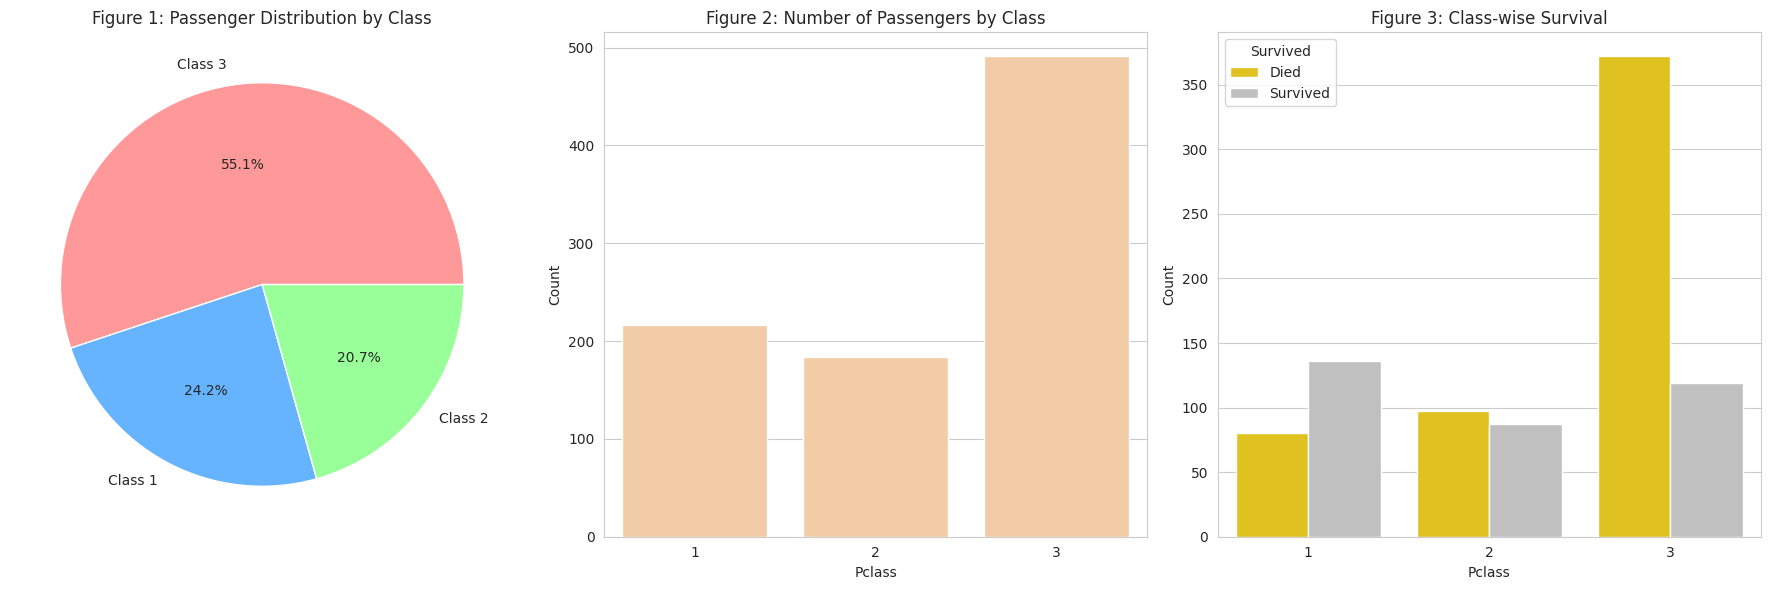

In [38]:
pclass_percentage = dataset['Pclass'].value_counts(normalize=True) * 100
df_pclass_percentage = pd.DataFrame({'Pclass': pclass_percentage.index, 'Percentage': pclass_percentage.values})

pclass_counts = dataset['Pclass'].value_counts()
df_pclass_counts = pd.DataFrame({'Pclass': pclass_counts.index, 'Count': pclass_counts.values})

pclass_survival = dataset.groupby(['Pclass', 'Survived']).size().reset_index(name='Count')
pclass_survival['Survived'] = pclass_survival['Survived'].map({0: 'Died', 1: 'Survived'})

pie_colors = ['#FF9999', '#66B3FF', '#99FF99']
bar_color = '#FFCC99'
survival_colors = ['#FFD700', '#C0C0C0']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

ax1.pie(df_pclass_percentage['Percentage'], labels=[f'Class {x}' for x in df_pclass_percentage['Pclass']], autopct='%1.1f%%', colors=pie_colors)
ax1.set_title("Figure 1: Passenger Distribution by Class")

sns.barplot(x='Pclass', y='Count', data=df_pclass_counts, ax=ax2, color=bar_color)
ax2.set_title("Figure 2: Number of Passengers by Class")

sns.barplot(x='Pclass', y='Count', hue='Survived', data=pclass_survival, ax=ax3, palette=survival_colors)
ax3.set_title("Figure 3: Class-wise Survival")

plt.tight_layout()
plt.show()

Прокоментуйте побудовані графіки

***Рисунок №1:*** Розподіл пасажирів за класами
Цей круговий діаграм показує відсоткове співвідношення пасажирів за класами на борту Титаніка. За даними графіка, більшість пасажирів (близько 55.1%) належали до третього класу, що свідчить про високий попит на більш доступні квитки. Пасажири першого класу становили приблизно 24.2% від загальної кількості, а другого — 20.7%, що вказує на меншу присутність пасажирів вищих класів.
<hr/>

***Рисунок №2:*** Кількісний аналіз пасажирів за класами
На цій гістограмі представлено абсолютну кількість пасажирів кожного класу. Пасажирів третього класу було значно більше — майже 500 осіб, що підтверджує дані про економічну доступність цього класу для широкого кола людей. Перший клас мав трохи більше 200 пасажирів, а другий — майже 200, що вказує на відмінності в соціальних шарах пасажирів.
<hr/>

***Рисунок №3:*** Аналіз виживання за класами
Цей графік ілюструє кількість виживших та загиблих пасажирів у залежності від класу. Значна кількість пасажирів третього класу (близько 375 осіб) не вижила, що може свідчити про гірші умови евакуації та розміщення в цьому сегменті. В той час як серед пасажирів першого класу вижило близько 140 осіб, що найбільше серед усіх класів, свідчить про кращі умови безпеки та швидкість реакції на надзвичайну ситуацію. Другий клас показав приблизно рівні кількості виживших та загиблих, що може бути пов’язано з розташуванням кают та доступом до шлюпок.

**Задача 7:** Побудуйте наступні графіки та опишіть, що власне на них відображається.  
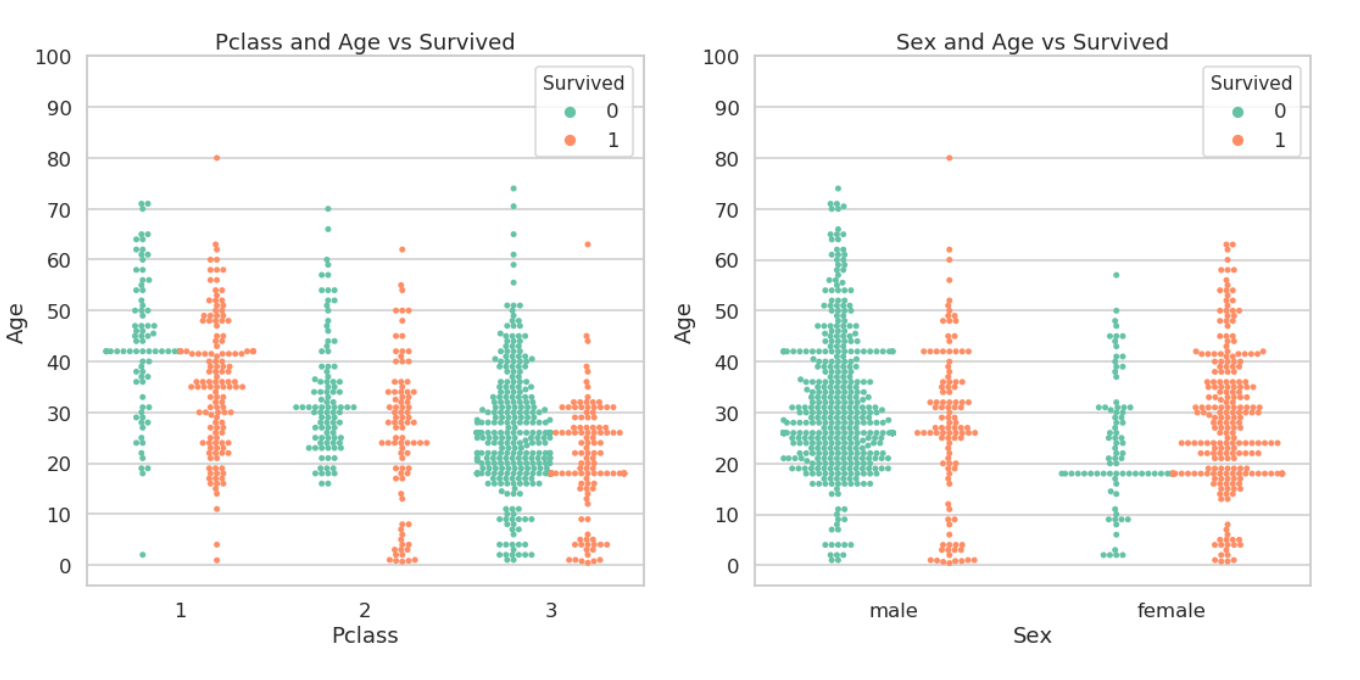![image.png](attachment:51486806-bd5d-4ae3-b95a-548aebf83de2.png)

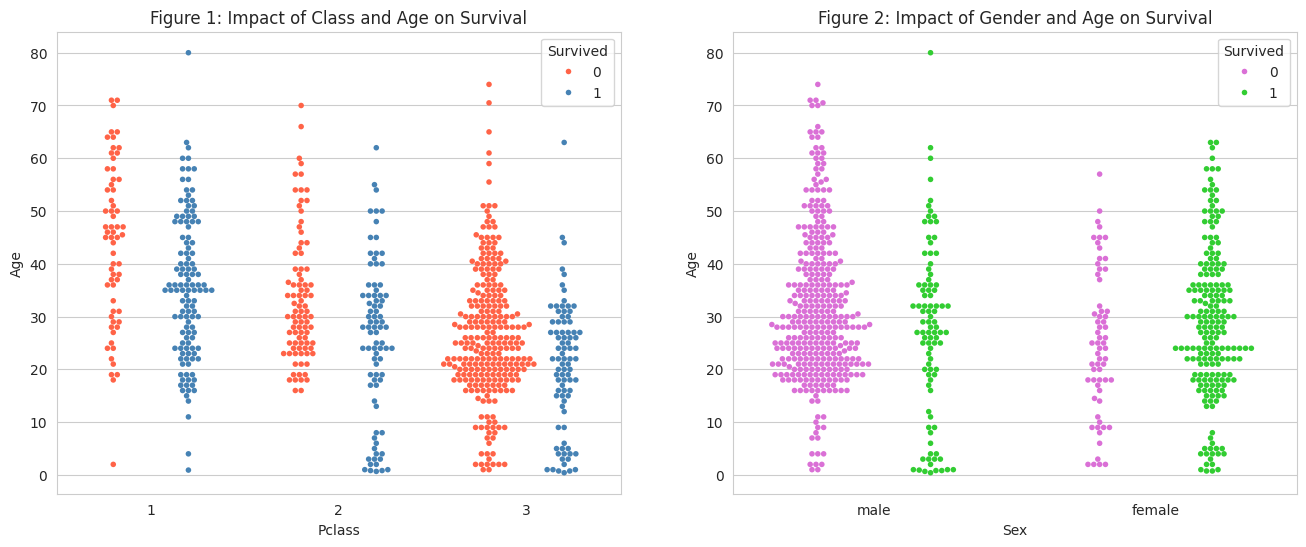

In [40]:
titanic_data = pd.read_csv("./titanic.csv")

class_age_survival_data = titanic_data[["Pclass", "Age", "Survived"]]
gender_age_survival_data = titanic_data[["Sex", "Age", "Survived"]]

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(16, 6))
sns.set_style("whitegrid")

class_palette = ['#FF6347', '#4682B4']
gender_palette = ['#DA70D6', '#32CD32']

sns.swarmplot(data=class_age_survival_data, x="Pclass", y="Age", hue="Survived", dodge=True, ax=axis1, size=4, palette=class_palette)
axis1.set_title("Figure 1: Impact of Class and Age on Survival")

sns.swarmplot(data=gender_age_survival_data, x="Sex", y="Age", hue="Survived", dodge=True, ax=axis2, size=4, palette=gender_palette)
axis2.set_title("Figure 2: Impact of Gender and Age on Survival")

plt.show()

Прокоментуйте побудовані графіки

***Рисунок №1:*** Вплив класу та віку на шанси виживання
На цьому графіку показано розподіл віку виживших та загиблих за класами на Титаніку. Особливо помітно, що більшість виживших з першого класу належали до вікової категорії від 20 до 65 років, що підкреслює високий рівень безпеки серед багатших пасажирів. В третьому класі, де умови були менш захищені, вища частка смертей спостерігалася серед молодших дорослих від 15 до 45 років. Цікаво, що всі діти до 15 років з другого класу вижили, але була значна кількість смертей серед осіб до 40 років.
<hr/>

***Рисунок №2:*** Вплив статі та віку на шанси виживання
Цей графік демонструє розподіл віку та виживання серед чоловіків та жінок. Значно вищий відсоток чоловіків, особливо у віковій категорії від 17 до 55 років, загинув, що свідчить про низькі шанси на виживання серед чоловіків у порівнянні з жінками. З іншого боку, багато дітей віком до 10 років вижили, незалежно від статі. Загибель жінок була більшою в вікових діапазонах 10-30 років та 37-50 років, що може вказувати на специфічні ситуації в евакуаційних процесах або розміщенні на кораблі.

**Задача 8** Побудуйте наступні діаграми розподілів:  

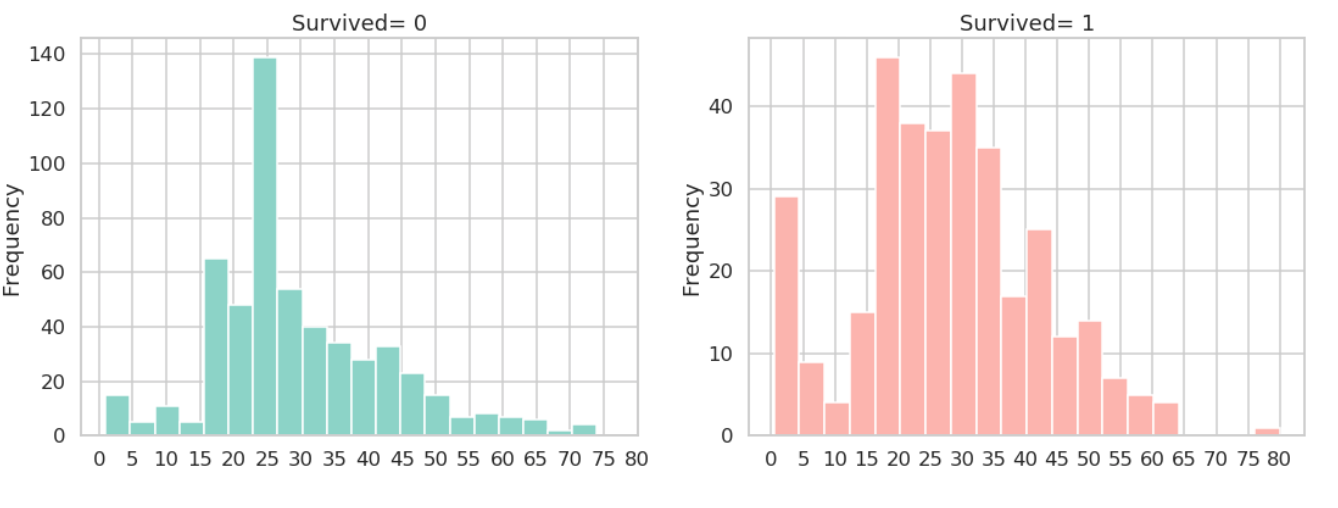



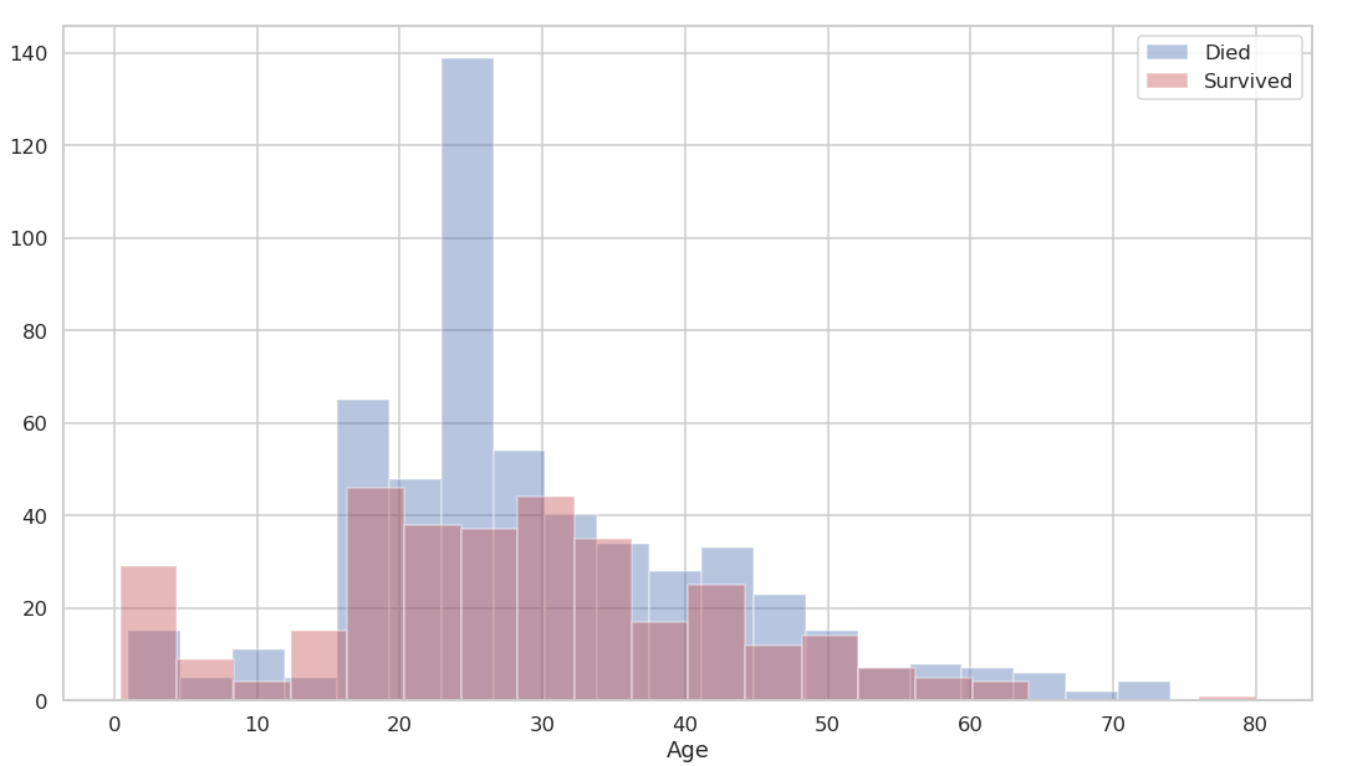

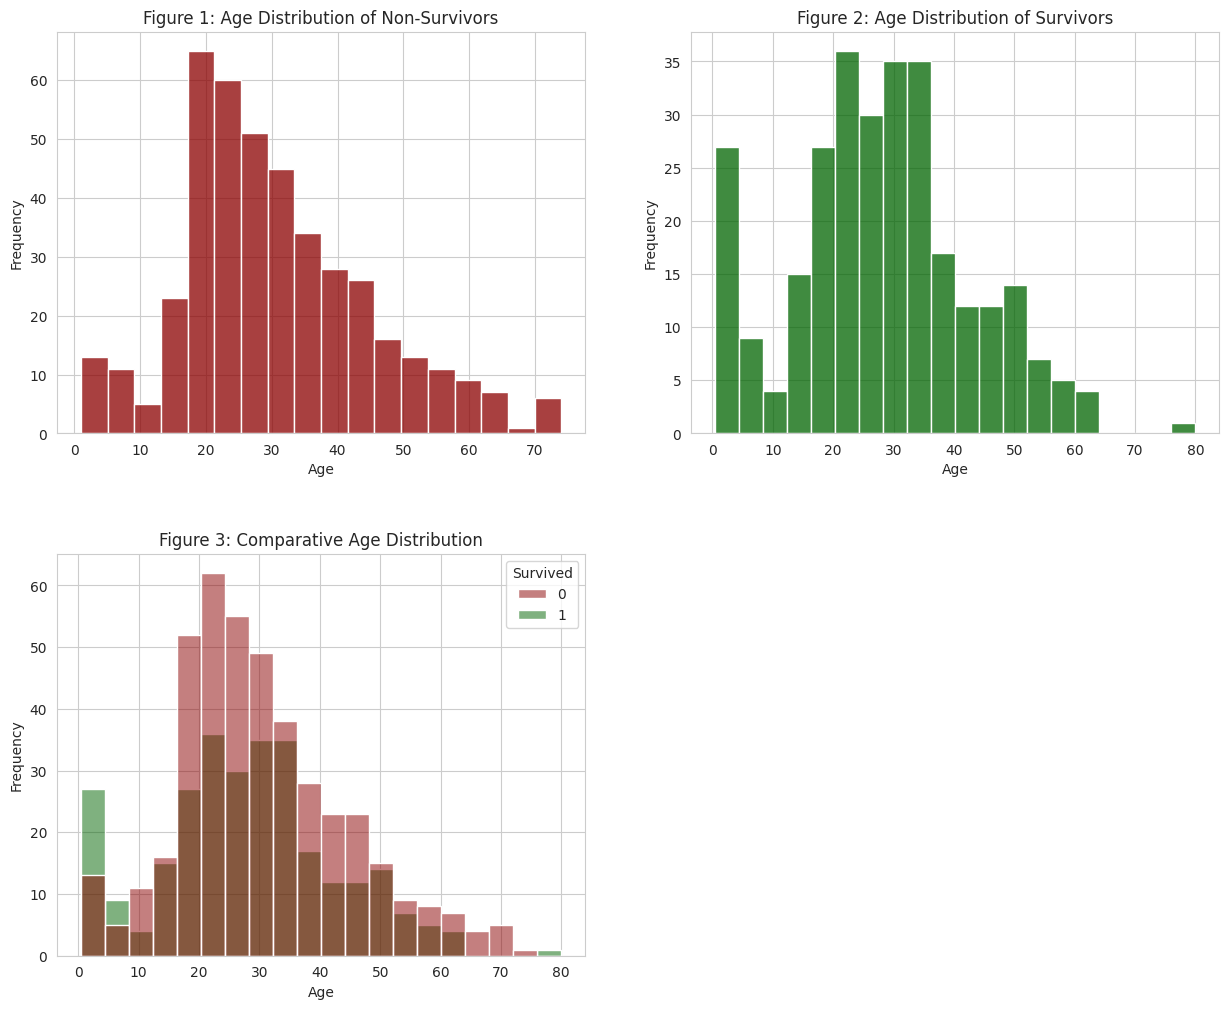

In [41]:
titanic_data = pd.read_csv("./titanic.csv")

ages_of_survivors = titanic_data[titanic_data["Survived"] == 1][["Age"]]
ages_of_non_survivors = titanic_data[titanic_data["Survived"] == 0][["Age"]]
age_survival_data = titanic_data[["Survived", "Age"]]

fig = plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.3)

ax1 = fig.add_subplot(2, 2, 1)
sns.histplot(data=ages_of_non_survivors, x="Age", ax=ax1, color='#8B0000', binwidth=4)  # Dark red color
ax1.set_title("Figure 1: Age Distribution of Non-Survivors")
ax1.set_ylabel("Frequency")

ax2 = fig.add_subplot(2, 2, 2)
sns.histplot(data=ages_of_survivors, x="Age", ax=ax2, color='#006400', binwidth=4)  # Dark green color
ax2.set_title("Figure 2: Age Distribution of Survivors")
ax2.set_ylabel("Frequency")

ax3 = fig.add_subplot(2, 2, 3)
sns.histplot(data=age_survival_data, x="Age", hue="Survived", ax=ax3, palette=["#8B0000", "#006400"], binwidth=4)  # Using the same dark red and green colors
ax3.set_title("Figure 3: Comparative Age Distribution")
ax3.set_ylabel("Frequency")

plt.show()

Що можна сказати, про розподіли змінних згідно до цих гістограм? Чи достатньо лише побудованих візуалізацій для висновків щодо розподілів та статистичних оцінок?

***Рисунок №1:*** Аналіз розподілу віку серед загиблих пасажирів
Цей графік відображає розподіл віку осіб, які не вижили під час катастрофи. На ньому можна побачити, що пік загибелі припадає на вікову групу 18-21 рік, що може свідчити про велику кількість молодих людей у найбільш вразливих групах на борту, таких як третій клас.
<hr/>

***Рисунок №2:*** Аналіз розподілу віку серед виживших пасажирів
Цей графік демонструє розподіл віку пасажирів, які вижили. З нього видно, що найбільше виживших зосереджено у віковій категорії 20-23 роки. Це може вказувати на більш активну участь молодих людей у евакуації або їх краще фізичне становище для виживання.
<hr/>

***Рисунок №3:*** Порівняльний аналіз розподілу віку серед загиблих та виживших
Графік надає змогу порівняти розподіли віку серед загиблих та виживших. Він демонструє, як вікові характеристики впливають на шанси виживання під час катастрофи. Цей візуальний аналіз дає змогу бачити загальні тенденції, але для більш глибокого розуміння динаміки виживання потрібно врахувати додаткові чинники, такі як стать, клас каюти, наявність сім'ї на борту та інші.
<hr/>

Щодо питання про достатність візуалізацій для висновків, то ці гістограми забезпечують корисний огляд вікових тенденцій серед виживших та загиблих. Однак, дійсно, для комплексного аналізу і статистичних оцінок цих явищ може бути необхідним включення додаткових змінних та проведення більш складних статистичних тестів, таких як логістична регресія, яка дозволить оцінити вплив різних факторів на шанси виживання в умовах контролю за іншими змінними.

**Задача 9:** Побудуйте наступні діаграми та проведіть аналітику шансів на виживання серед пасажирів:  
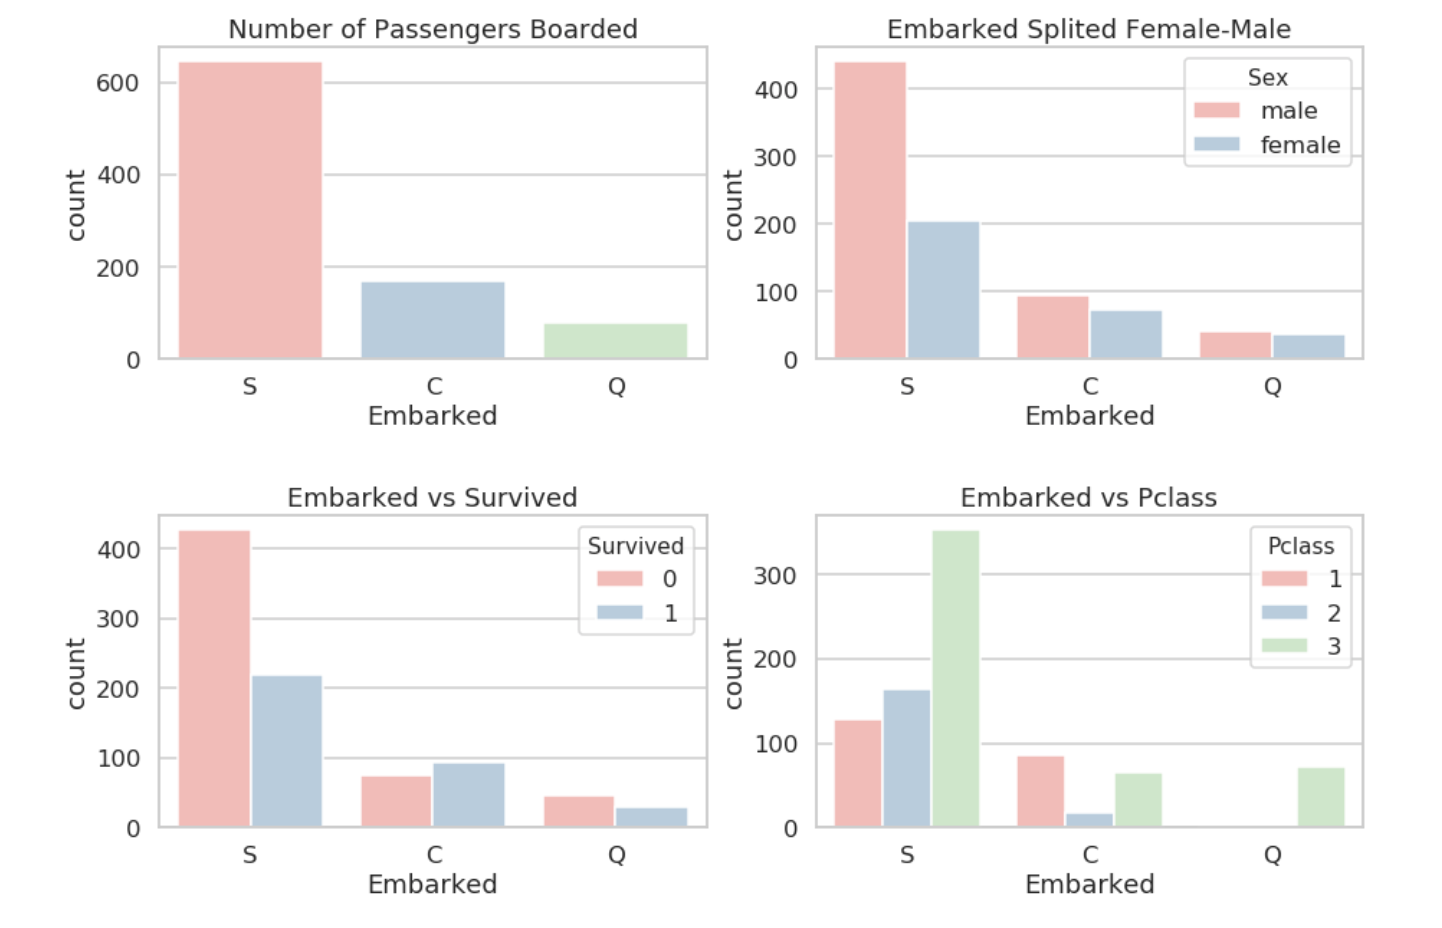

<ipython-input-43-e76f65c366dd>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_embarkation, x="Embarked", y="Count", ax=axes[0, 0], palette=color_palette[:3])
<ipython-input-43-e76f65c366dd>:32: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(data=df_class, x="Embarked", y="Count", ax=axes[1, 1], hue="Pclass", palette=color_palette)


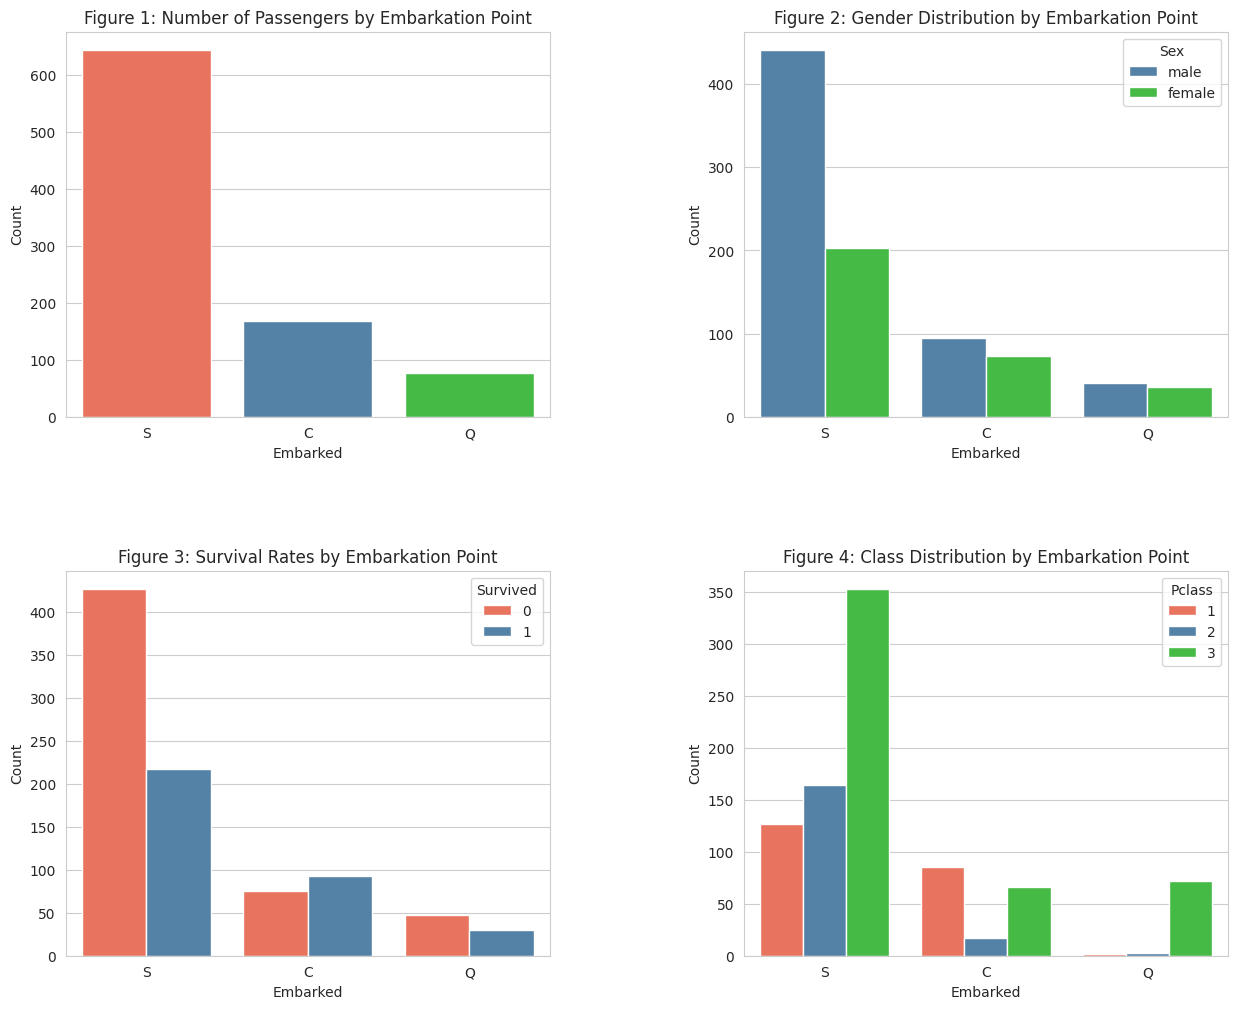

In [43]:
titanic_dataset = pd.read_csv("./titanic.csv")

embarkation_data = titanic_dataset[["Embarked"]]
embarkation_gender_data = titanic_dataset[["Embarked", "Sex"]]
embarkation_survival_data = titanic_dataset[["Embarked", "Survived"]]
embarkation_class_data = titanic_dataset[["Embarked", "Pclass"]]

embarkation_counts = embarkation_data.value_counts()
embarkation_gender_counts = embarkation_gender_data.value_counts().sort_values(ascending=False)
embarkation_survival_counts = embarkation_survival_data.value_counts().sort_values(ascending=False)
embarkation_class_counts = embarkation_class_data.value_counts().sort_values(ascending=False)

df_embarkation = pd.DataFrame({"Embarked": embarkation_counts.index.get_level_values("Embarked"), "Count": embarkation_counts.values})
df_gender = pd.DataFrame({"Embarked": embarkation_gender_counts.index.get_level_values("Embarked"), "Sex": embarkation_gender_counts.index.get_level_values("Sex"), "Count": embarkation_gender_counts.values})
df_survival = pd.DataFrame({"Embarked": embarkation_survival_counts.index.get_level_values("Embarked"), "Survived": embarkation_survival_counts.index.get_level_values("Survived"), "Count": embarkation_survival_counts.values})
df_class = pd.DataFrame({"Embarked": embarkation_class_counts.index.get_level_values("Embarked"), "Pclass": embarkation_class_counts.index.get_level_values("Pclass"), "Count": embarkation_class_counts.values})

color_palette = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.barplot(data=df_embarkation, x="Embarked", y="Count", ax=axes[0, 0], palette=color_palette[:3])
axes[0, 0].set_title("Figure 1: Number of Passengers by Embarkation Point")

sns.barplot(data=df_gender, x="Embarked", y="Count", ax=axes[0, 1], hue="Sex", palette=color_palette[1:3])
axes[0, 1].set_title("Figure 2: Gender Distribution by Embarkation Point")

sns.barplot(data=df_survival, x="Embarked", y="Count", ax=axes[1, 0], hue="Survived", palette=color_palette[:2])
axes[1, 0].set_title("Figure 3: Survival Rates by Embarkation Point")

sns.barplot(data=df_class, x="Embarked", y="Count", ax=axes[1, 1], hue="Pclass", palette=color_palette)
axes[1, 1].set_title("Figure 4: Class Distribution by Embarkation Point")

plt.show()

***Рисунок №1:*** Кількість пасажирів за портами посадки
Цей графік демонструє загальну кількість пасажирів, які здійснили посадку на Титанік у трьох різних портах. Найвища кількість пасажирів, приблизно 650, сіла на корабель у Southampton, що робить цей порт найпопулярнішим місцем відправлення. Cherbourg з наступним показником близько 170 пасажирів, а Queenstown мав найменше пасажирів, приблизно 80.
<hr/>

***Рисунок №2:*** Гендерний розподіл пасажирів за портами посадки
На цьому графіку представлено розподіл жінок та чоловіків за портами посадки. У Southampton сіло значно більше чоловіків (близько 450) порівняно з жінками (близько 200). У Queenstown кількість чоловіків і жінок була майже однакова, що свідчить про більш рівномірний розподіл за статтю.
<hr/>

***Рисунок №3:*** Виживаність пасажирів залежно від порту посадки
Цей графік ілюструє відношення виживших та загиблих серед пасажирів, які сіли на борт у різних портах. Зокрема, в порту Cherbourg вижило більше людей, ніж загинуло, що виділяє цей порт серед інших. Натомість у Southampton та Queenstown кількість загиблих значно перевищила кількість виживших.
<hr/>

***Рисунок №4:*** Клас пасажирів за портами посадки
На цьому графіку представлено розподіл пасажирів за класами, що залежить від порту посадки. Видно, що у Southampton було більшість пасажирів усіх трьох класів. У Queenstown переважно сідали пасажири третього класу, а в Cherbourg було більше пасажирів першого та третього класів порівняно з другим.

***Завдача 10** Побудуйте діаграму розподілу ```вартості квитка``` відповідно до якого классу належіть пасажир.

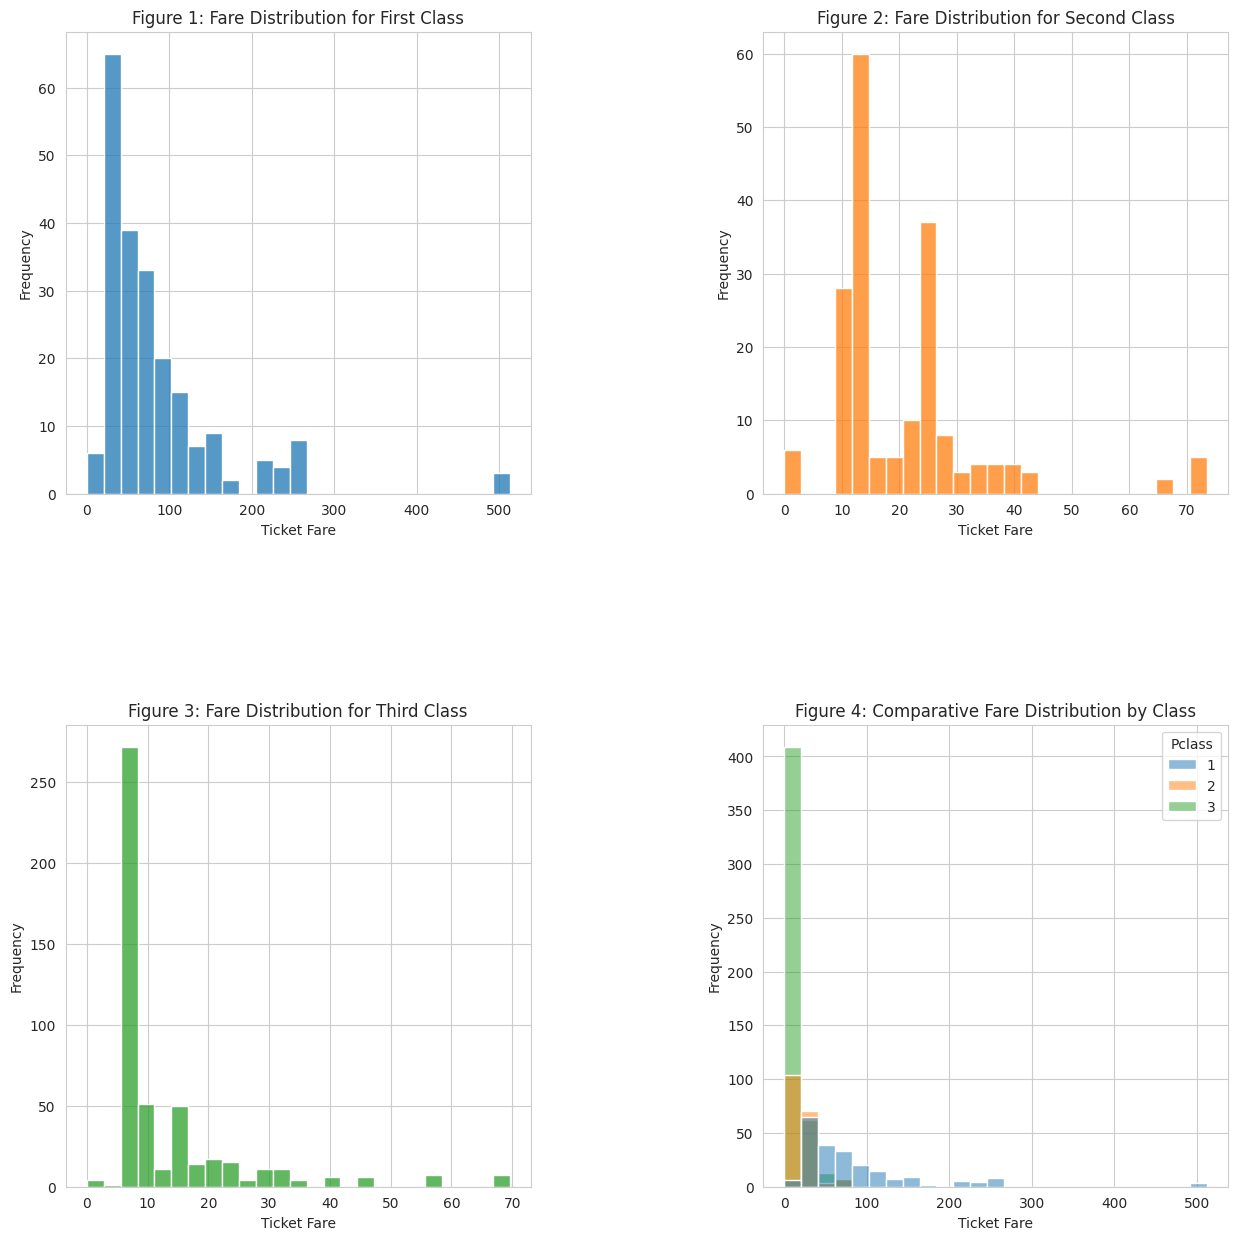

In [45]:
titanic_data = pd.read_csv("./titanic.csv")

fare_class_1 = titanic_data[titanic_data["Pclass"] == 1][["Fare"]]
fare_class_2 = titanic_data[titanic_data["Pclass"] == 2][["Fare"]]
fare_class_3 = titanic_data[titanic_data["Pclass"] == 3][["Fare"]]
all_classes_fare = titanic_data[["Pclass", "Fare"]]

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c']

sns.histplot(data=fare_class_1, x="Fare", ax=axes[0, 0], color=color_palette[0], bins=25)
axes[0, 0].set_title("Figure 1: Fare Distribution for First Class")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].set_xlabel("Ticket Fare")

sns.histplot(data=fare_class_2, x="Fare", ax=axes[0, 1], color=color_palette[1], bins=25)
axes[0, 1].set_title("Figure 2: Fare Distribution for Second Class")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].set_xlabel("Ticket Fare")

sns.histplot(data=fare_class_3, x="Fare", ax=axes[1, 0], color=color_palette[2], bins=25)
axes[1, 0].set_title("Figure 3: Fare Distribution for Third Class")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].set_xlabel("Ticket Fare")

sns.histplot(data=all_classes_fare, x="Fare", hue="Pclass", ax=axes[1, 1], palette=color_palette, bins=25)
axes[1, 1].set_title("Figure 4: Comparative Fare Distribution by Class")
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].set_xlabel("Ticket Fare")

plt.show()

Прокоментуйте побудовані графіки

***Рисунок №1:*** Розподіл вартості квитків для пасажирів першого класу
Цей графік ілюструє розподіл цін квитків першого класу. Найбільша кількість квитків мала ціну від 20 до 60 доларів, що свідчить про стандартний діапазон вартості для цього сегменту. Максимальна ціна деяких квитків сягала 500 доларів, що вказує на ексклюзивні пропозиції або спеціальні умови проживання на борту.
<hr/>

***Рисунок №2:*** Розподіл вартості квитків для пасажирів другого класу
На цьому графіку видно, що більшість квитків другого класу коштувала між 12 та 15 доларами. Найдорожчі квитки перевищували 70 доларів, але їх було відносно мало. Це демонструє помірні ціни та доступність другого класу для середнього класу пасажирів.
<hr/>

***Рисунок №3:*** Розподіл вартості квитків для пасажирів третього класу
Графік показує, що переважна більшість квитків третього класу мала вартість до 10 доларів, що підкреслює їх доступність для пасажирів з меншими доходами. Ціни на квитки вище 10 доларів були рідкісними та не перевищували 70 доларів.
<hr/>

***Рисунок №4:*** Загальний розподіл вартості квитків за класами
Цей графік забезпечує порівняльний аналіз вартості квитків між усіма класами. Найбільш очевидно, що квитки третього класу були значно дешевшими, а квитки першого класу могли досягати 500 доларів. Це вказує на значні відмінності в умовах проживання та послугах, які надаються пасажирам різних класів.